In [6]:
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt;
from sklearn.model_selection import train_test_split

In [7]:
features = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'intrusion_type']

In [8]:
data = pd.read_csv('dataset/kddcup/kddcup.data_10_percent', names=features, header=None)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [9]:
print('The no of data points are:',data.shape[0])
print('The no of features are:',data.shape[1])
print('Some of the features are:',features[:10])

The no of data points are: 494021
The no of features are: 42
Some of the features are: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot']


In [10]:
output = data['intrusion_type'].values
labels = set(output)

In [11]:
print('The different type of output labels are:',labels)

The different type of output labels are: {'land.', 'nmap.', 'neptune.', 'perl.', 'warezmaster.', 'loadmodule.', 'portsweep.', 'back.', 'normal.', 'imap.', 'multihop.', 'spy.', 'smurf.', 'ipsweep.', 'satan.', 'guess_passwd.', 'teardrop.', 'ftp_write.', 'pod.', 'phf.', 'warezclient.', 'rootkit.', 'buffer_overflow.'}


Data Cleaning

In [12]:
data.drop_duplicates(subset=features, keep='first', inplace=True)
data.shape

(145586, 42)

In [13]:
data.to_pickle('data.pkl')
data = pd.read_pickle('data.pkl')

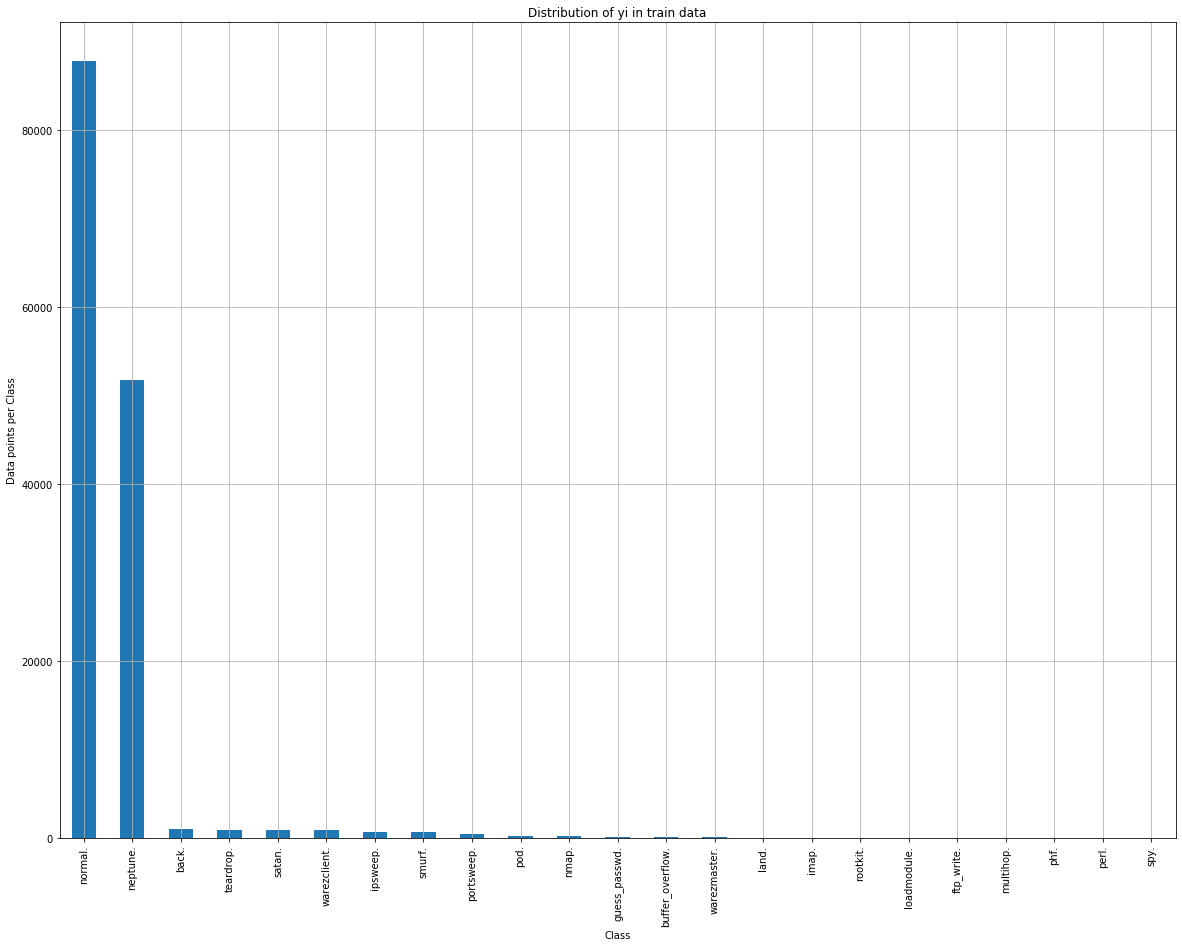

In [14]:
plt.figure(figsize=(20,15))
class_distribution = data['intrusion_type'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

Most of the data points are from "normal" (good connections) category which is around 60.33 %.

In the categories that belong to bad connections, "neptune." (35.594 %) and "back." (0.665 %) have the highest no. of data points.

Classes "rootkit.", "loadmodule.", "ftp_write.", "multihop.", "phf.", "perl.", "spy." have the least no. of data points with less than 10 data points per class.

The dataset is highly imbalanced, thus we will need to build a model which should be able to classify data points from these low distribution classes accurately.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

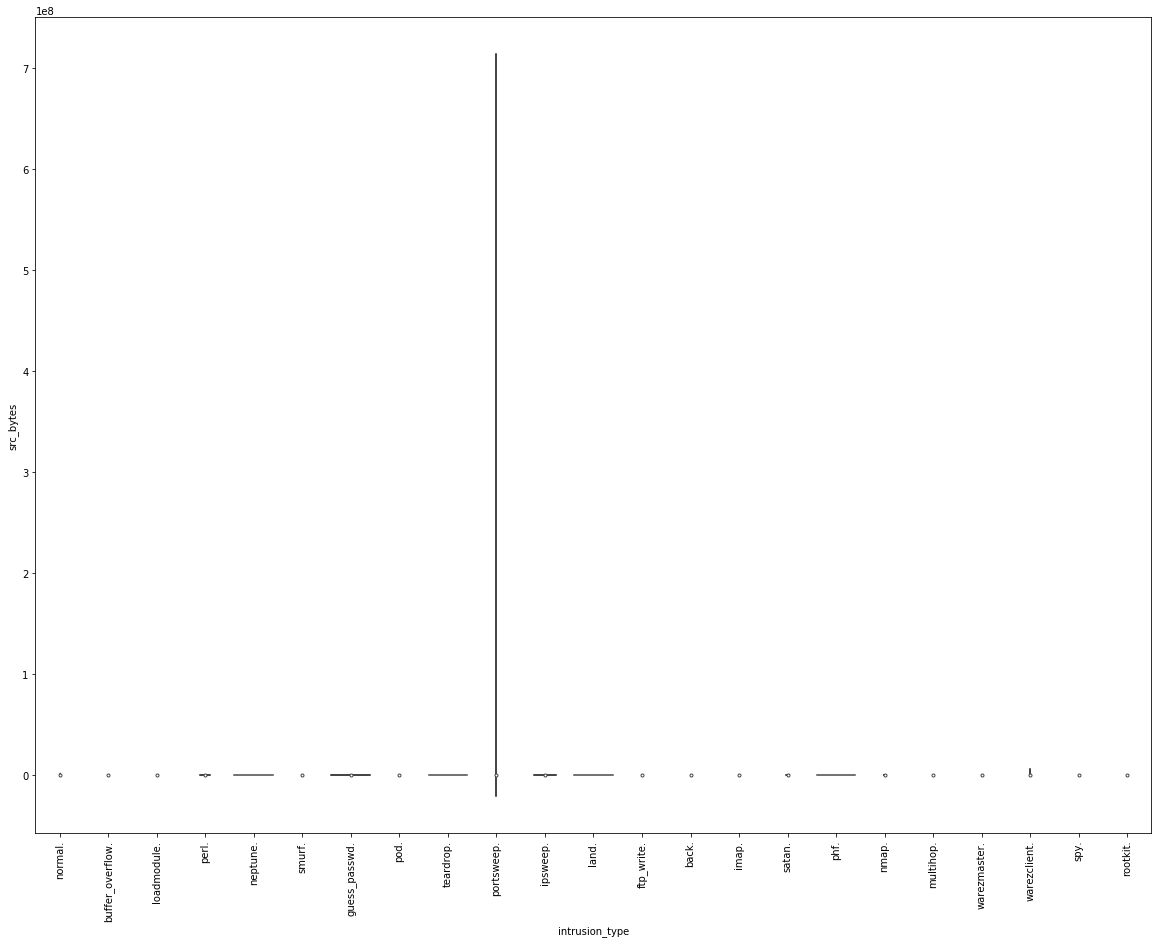

In [15]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.violinplot(x="intrusion_type", y="src_bytes", data=data)
plt.xticks(rotation=90)

 Using src_bytes as a feature for analysis, the intrusion category "portsweep" is distinguishable from rest of the categories.

In [16]:
def pairplot(data, label, features=[]):
    '''
    This function creates pairplot taking 4 features from our dataset as default parameters along with the output variable
    '''
    sns.pairplot(data, hue=label, height=4, diag_kind='hist', vars=features,
            plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'})

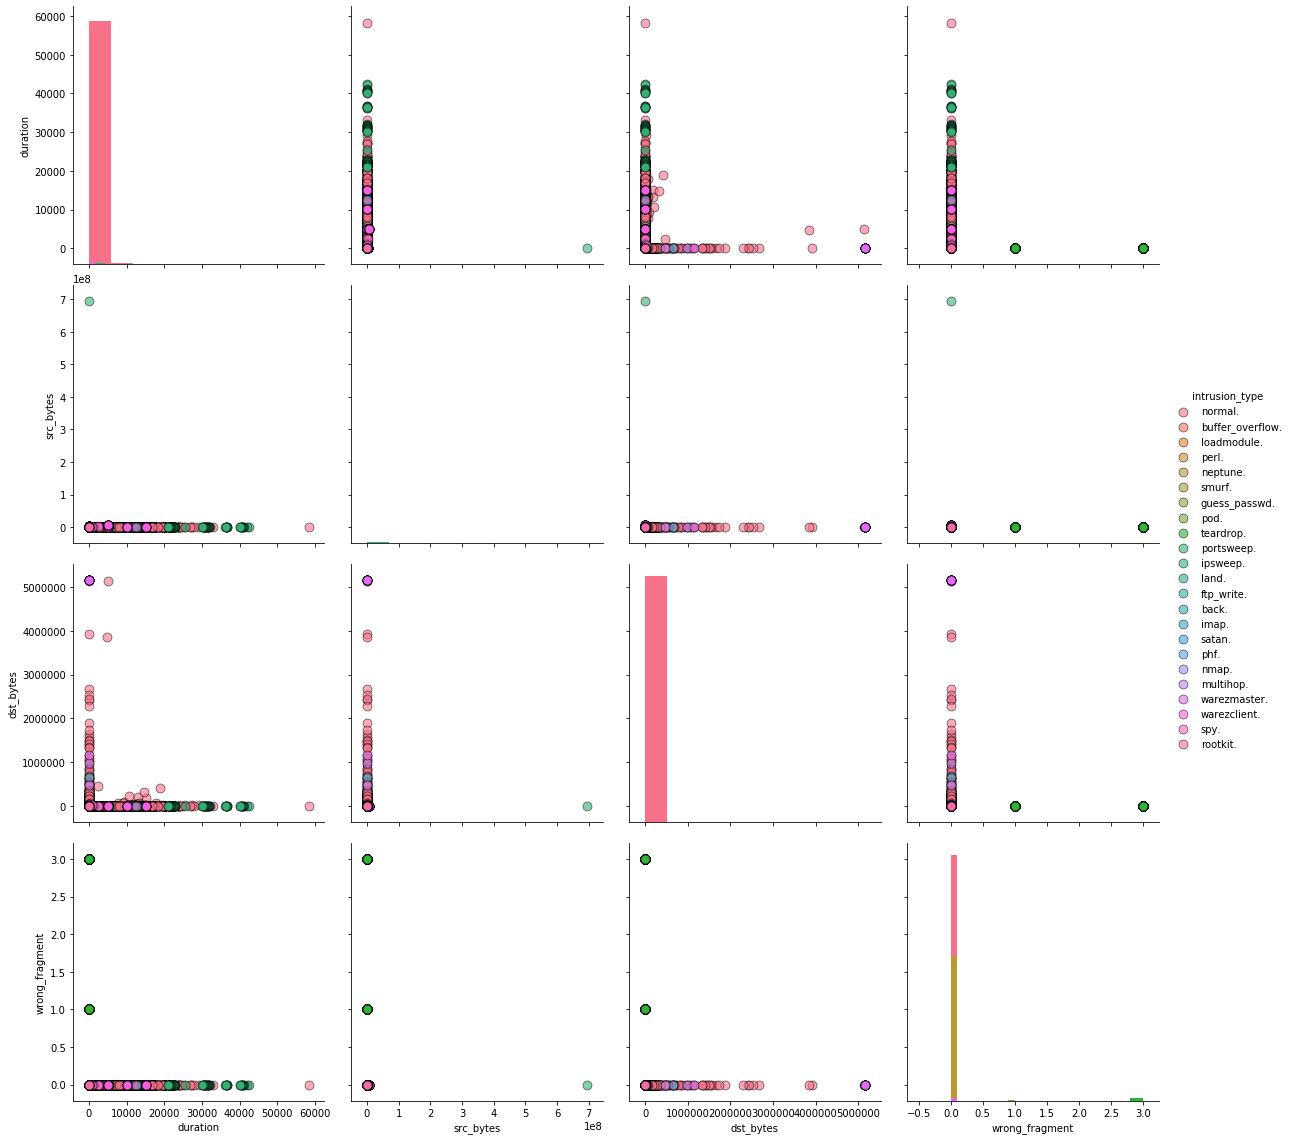

In [17]:
pairplot(data, 'intrusion_type', features=['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment'])

Train Test Split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(
    data.drop('intrusion_type', axis=1), 
    data['intrusion_type'], 
    stratify=data['intrusion_type'], 
    test_size=0.25)

In [19]:
print('Train data')
print(X_train.shape)
print(Y_train.shape)
print('='*20)
print(X_test.shape)
print(Y_test.shape)

Train data
(109189, 41)
(109189,)
(36397, 41)
(36397,)



Vectorizing Categorical features using one-hot encoding:


Categorical features in our dataset are:- 'protocol_type', 'service', and 'flag'.

In [20]:
protocol = list(X_train['protocol_type'].values)
protocol = list(set(protocol))
print('Protocol types are:', protocol)

Protocol types are: ['icmp', 'udp', 'tcp']


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(vocabulary=protocol, binary=True)
train_protocol = one_hot.fit_transform(X_train['protocol_type'].values)
test_protocol = one_hot.transform(X_test['protocol_type'].values)

In [22]:
print(train_protocol[1].toarray())
train_protocol.shape

[[0 0 1]]


(109189, 3)

In [23]:
service = list(X_train['service'].values)
service = list(set(service))
print('Service types are:\n', service)

Service types are:
 ['discard', 'ssh', 'http_443', 'gopher', 'tim_i', 'link', 'urh_i', 'systat', 'Z39_50', 'nnsp', 'uucp', 'red_i', 'urp_i', 'rje', 'smtp', 'mtp', 'ldap', 'kshell', 'finger', 'efs', 'ftp_data', 'printer', 'shell', 'whois', 'time', 'csnet_ns', 'login', 'X11', 'netbios_ns', 'name', 'imap4', 'domain_u', 'sql_net', 'auth', 'sunrpc', 'daytime', 'telnet', 'supdup', 'tftp_u', 'nntp', 'pm_dump', 'ntp_u', 'private', 'vmnet', 'netstat', 'IRC', 'ftp', 'pop_3', 'netbios_dgm', 'hostnames', 'uucp_path', 'netbios_ssn', 'domain', 'exec', 'bgp', 'echo', 'http', 'other', 'eco_i', 'ecr_i', 'ctf', 'courier', 'pop_2', 'remote_job', 'iso_tsap', 'klogin']


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(vocabulary=service, binary=True)
train_service = one_hot.fit_transform(X_train['service'].values)
test_service = one_hot.transform(X_test['service'].values)

In [25]:
print(train_service[100].toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [26]:
flag = list(X_train['flag'].values)
flag = list(set(flag))
print('flag types are:', flag)

flag types are: ['SF', 'RSTOS0', 'RSTR', 'SH', 'RSTO', 'S1', 'OTH', 'REJ', 'S2', 'S0', 'S3']


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(binary=True)
one_hot.fit(X_train['flag'].values)
train_flag = one_hot.transform(X_train['flag'].values)
test_flag = one_hot.transform(X_test['flag'].values)

In [28]:
print(test_flag[3000].toarray())
train_flag.shape

[[0 1 0 0 0 0 0 0 0 0 0]]


(109189, 11)

In [29]:
X_train.drop(['protocol_type','service','flag'], axis=1, inplace=True)
X_test.drop(['protocol_type','service','flag'], axis=1, inplace=True)

Applying Standardisation on the continuous features of our dataset:-


In [30]:
def feature_scaling(X_train, X_test, feature_name):
    
    '''
    This function performs standardisation on the features
    '''
    
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaler1 = scaler.fit_transform(X_train[feature_name].values.reshape(-1,1))
    scaler2 = scaler.transform(X_test[feature_name].values.reshape(-1,1))
    
    return scaler1, scaler2

# Applying Machine Learning Algorithm

In [31]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.externals import joblib

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [32]:
def confusion_matrix_func(Y_test, y_test_pred):
    '''
    This function plots the confusion matrix heatmap using the actual and predicted values.
    '''
    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmaster', 'rootkit', 
              'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf',
              'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    
    plt.show()

In [33]:
def model(model_name, X_train, Y_train, X_test, Y_test):
    
    '''
    This function computes the performance scores on the train and test data.
    '''
    
    print('Fitting the model and prediction on train data:')
    start = dt.datetime.now()
    model_name.fit(X_train, Y_train)
    y_tr_pred = model_name.predict(X_train)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    
    results_tr = dict()
    y_tr_pred = model_name.predict(X_train)
    results_tr['accuracy'] = accuracy_score(Y_train, y_tr_pred)
    results_tr['precision'] = precision_score(Y_train, y_tr_pred, average='weighted')
    results_tr['recall'] = recall_score(Y_train, y_tr_pred, average='weighted')
    results_tr['f1_score'] = f1_score(Y_train, y_tr_pred, average='weighted')
    
    results_test = dict()
    print('Prediction on test data:')
    start = dt.datetime.now()
    y_test_pred = model_name.predict(X_test)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    
    print('Performance metrics:')
    print('='*50)
    print('Confusion Matrix is:')
    confusion_matrix_func(Y_test, y_test_pred)
    print('='*50)
    print('Accuracy score is:')
    print(results_tr['accuracy'])
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('='*50)
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(precision_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(recall_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(f1_score(Y_test, y_test_pred, average='weighted'))
    # add the trained  model to the results
    results_test['model'] = model
    
    return results_tr, results_test


In [34]:
def print_grid_search_attributes(model):
    
    '''
    This function prints all the grid search attributes
    '''
    
    print('---------------------------')
    print('|      Best Estimator     |')
    print('---------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('---------------------------')
    print('|     Best parameters     |')
    print('---------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('----------------------------------')
    print('|   No of CrossValidation sets   |')
    print('----------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('---------------------------')
    print('|        Best Score       |')
    print('---------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

In [35]:
def tpr_fpr_func(Y_tr, Y_pred):
    '''
    This function computes the TPR and FPR scores using the actual and predicetd values
    '''
    results = dict()
    Y_tr = Y_tr.to_list()
    tp = 0; fp = 0; positives = 0; negatives = 0; length = len(Y_tr)
    for i in range(len(Y_tr)):
        if Y_tr[i]=='normal.':
            positives += 1
        else:
            negatives += 1
            
    for i in range(len(Y_pred)):
        if Y_tr[i]=='normal.' and Y_pred[i]=='normal.':
            tp += 1
        elif Y_tr[i]!='normal.' and Y_pred[i]=='normal.':
            fp += 1
            
    tpr = tp/positives
    fpr = fp/negatives
    
    results['tp'] = tp; results['tpr'] = tpr; results['fp'] = fp; results['fpr'] = fpr
    
    return results

# Model 1: Decision Tree

In [36]:
hyperparameter = {'max_depth':[5, 10, 20, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500]}

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced')
decision_tree_grid = GridSearchCV(decision_tree, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 3 folds for each of 24 candidates, totalling 72 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   47.5s finished


Completed
Time taken: 0:00:50.311760
Prediction on test data:
Completed
Time taken: 0:00:00.032468
Performance metrics:
Confusion Matrix is:


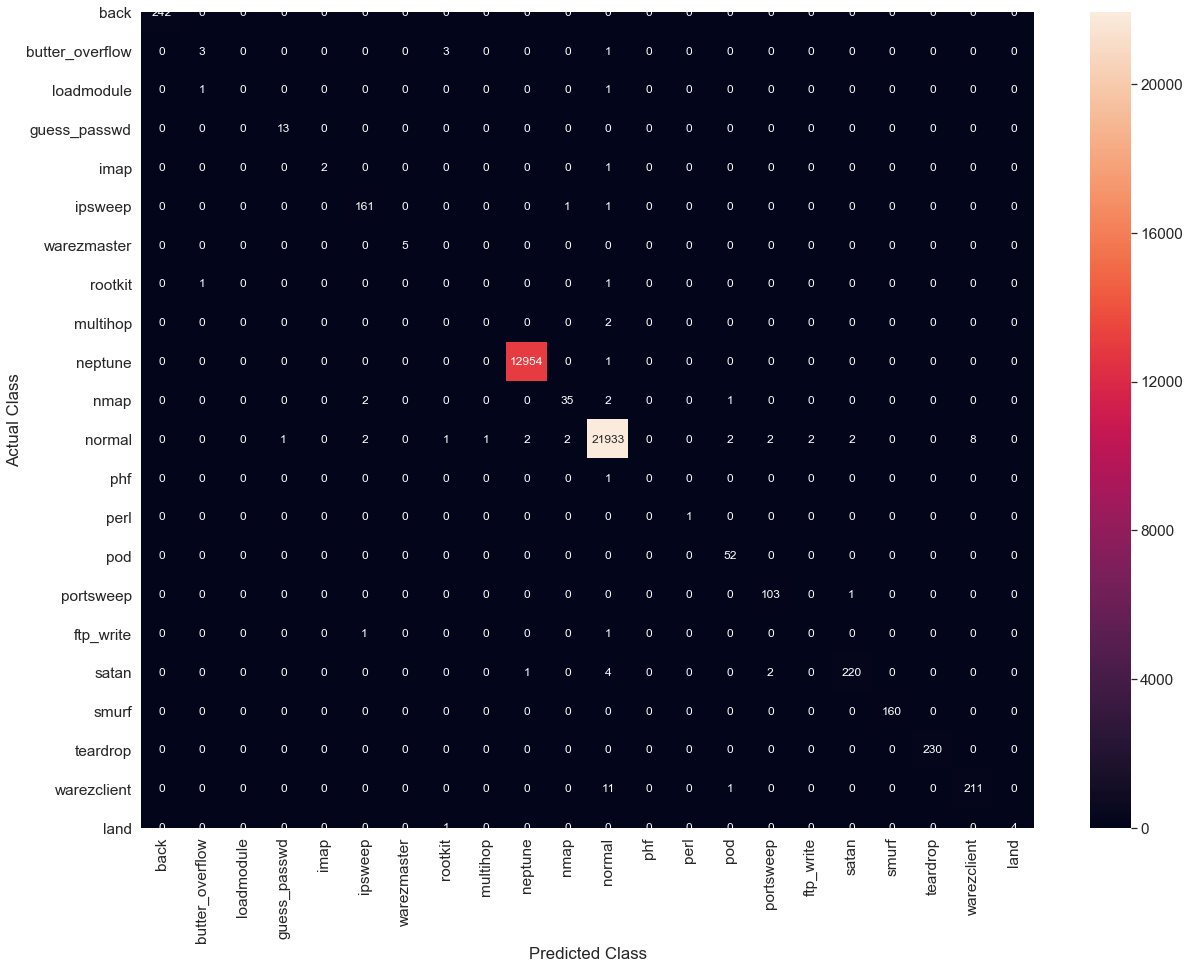

Accuracy score is:
0.9996886133218548


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision score is:
0.9980878850126298
Recall score is:
0.9981317141522653


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1-score is:
0.9980978742496139


In [37]:
decision_tree_grid_results_tr, decision_tree_grid_results_test = model(decision_tree_grid, X_train, Y_train, X_test, Y_test)

In [38]:
print_grid_search_attributes(decision_tree_grid)

---------------------------
|      Best Estimator     |
---------------------------

	DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=500,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'max_depth': 500, 'min_samples_split': 5}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 3

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9976554414822005



In [39]:
joblib.dump(decision_tree_grid.best_estimator_, 'decision_tree_gs.pkl')

['decision_tree_gs.pkl']

In [40]:


dt_gs = decision_tree_grid.best_estimator_
y_tr_pred = dt_gs.predict(X_train)
y_test_pred = dt_gs.predict(X_test)
dt_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
dt_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)
decision_tree_grid_results_tr


{'accuracy': 0.9996886133218548,
 'precision': 0.9997125188135029,
 'recall': 0.9996886133218548,
 'f1_score': 0.9996956711972658}

In [41]:
dt_tpr_fpr_train

{'tp': 65845, 'tpr': 0.9995597656131402, 'fp': 0, 'fpr': 0.0}

In [42]:
dt_tpr_fpr_test


{'tp': 21933, 'tpr': 0.998861462792604, 'fp': 27, 'fpr': 0.0018699355911074174}

 Observations from applying Decision Tree Classifier:- 

Out of the 21958 Normal connection points, 21934 (99.89%) were correctly classified by the Decision Tree Classifier.

Out of the 14439 points belonging to Bad connections, class Neptune has the highest no. of data points 12955, out of which 12953(99.98%) were classified correctly.


# Model 2: Random Forest Classifier

Fitting the model and prediction on train data:
Completed
Time taken: 0:00:14.730703
Prediction on test data:
Completed
Time taken: 0:00:00.678530
Performance metrics:
Confusion Matrix is:


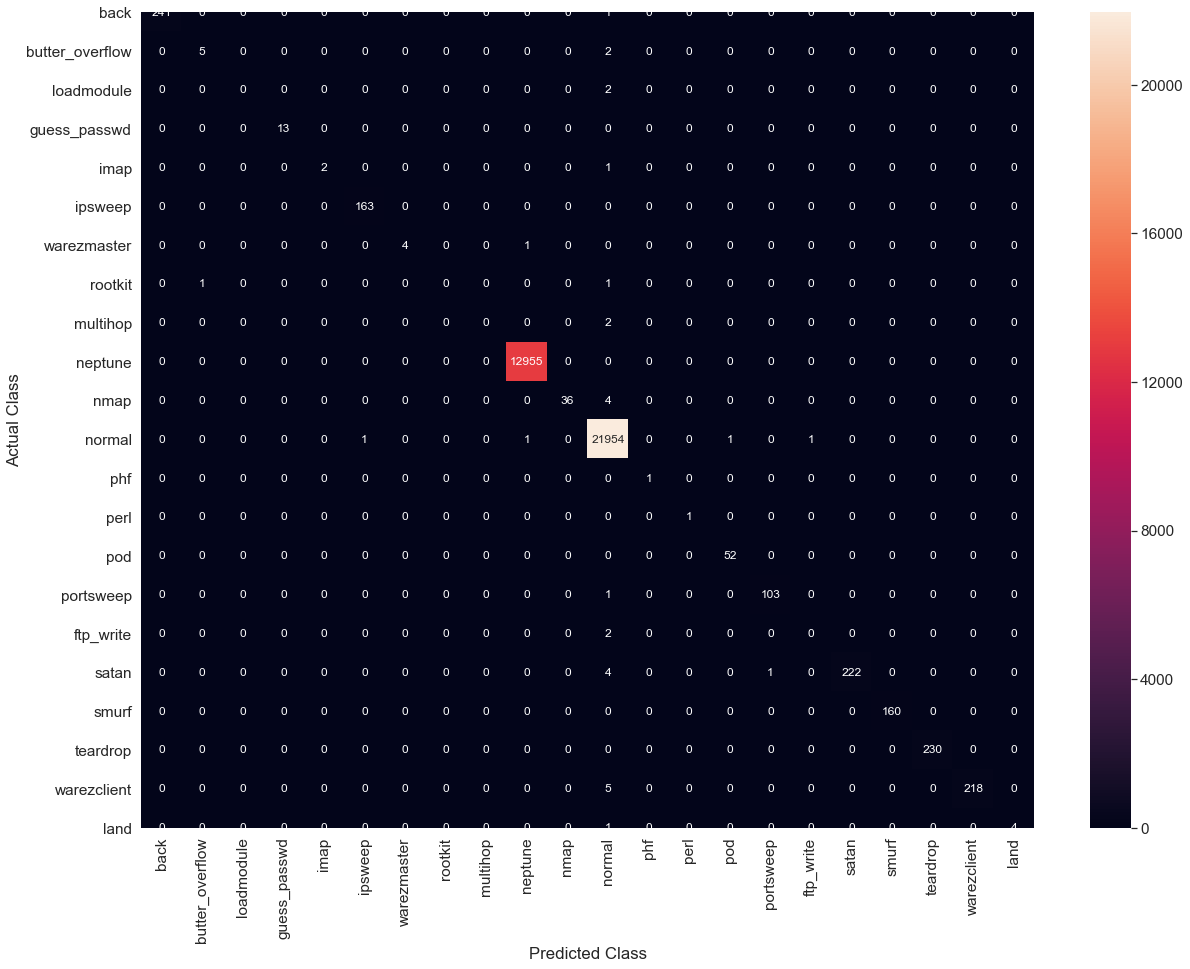

Accuracy score is:
0.9999908415682899


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision score is:
0.998897838590822
Recall score is:
0.9990933318680111


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1-score is:
0.9989841168318333


In [43]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(n_estimators=100)
randomForest_tr, randomForest_test = model(randomForest, X_train, Y_train, X_test, Y_test)

# Model 3: Naive Bayes

Fitting the model and prediction on train data:
Completed
Time taken: 0:00:01.327706


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Prediction on test data:
Completed
Time taken: 0:00:00.215075
Performance metrics:
Confusion Matrix is:


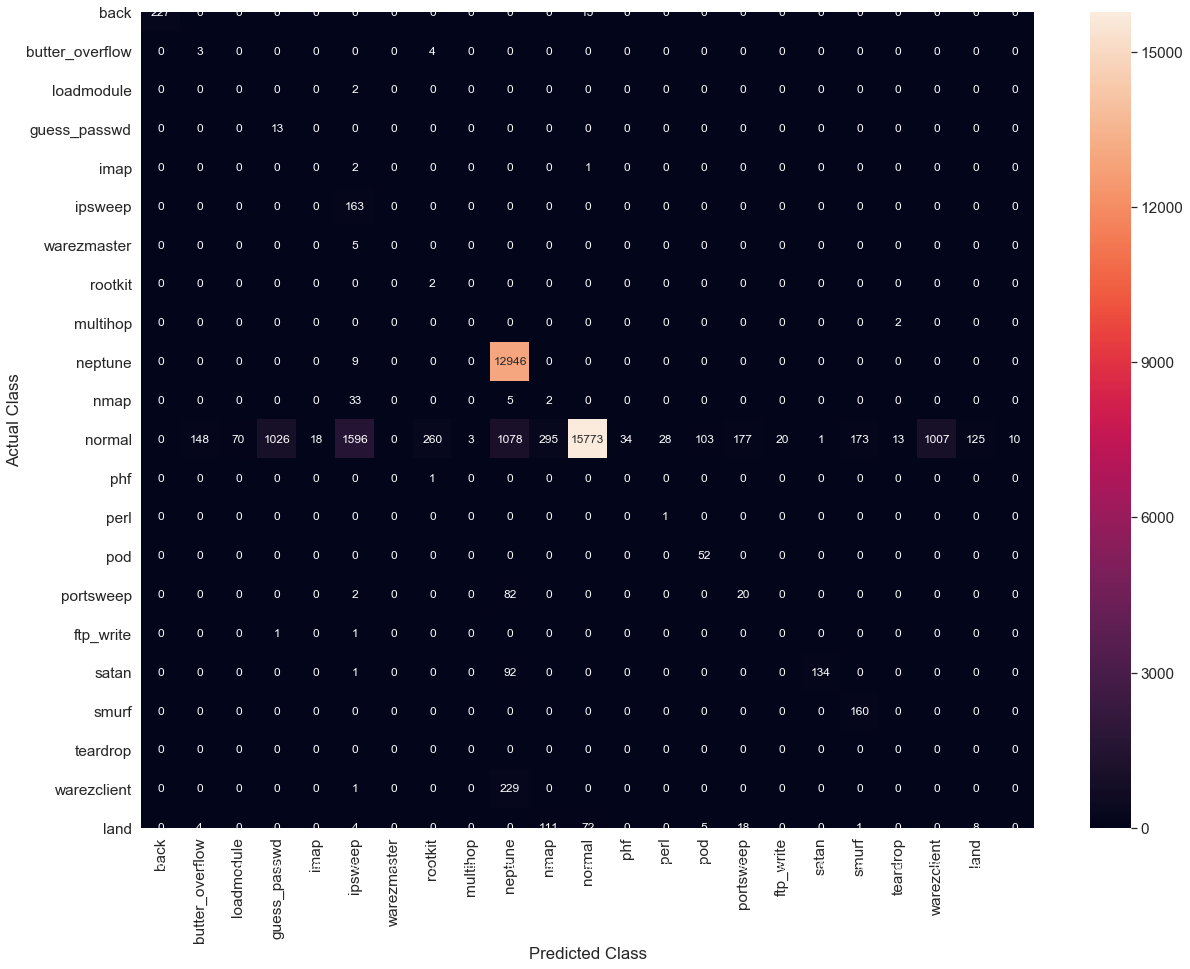

Accuracy score is:
0.8100816016265374


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision score is:
0.9357305398679461


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Recall score is:
0.8107261587493475


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


F1-score is:
0.8557887333454768


In [44]:
from sklearn.naive_bayes import GaussianNB
gaussian_nb = GaussianNB()
gaussian_nb_tr, gaussian_nb_test = model(gaussian_nb, X_train, Y_train, X_test, Y_test)

# Model 5: KNN

Fitting the model and prediction on train data:
Completed
Time taken: 0:00:27.120960


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Prediction on test data:
Completed
Time taken: 0:00:04.588773
Performance metrics:
Confusion Matrix is:


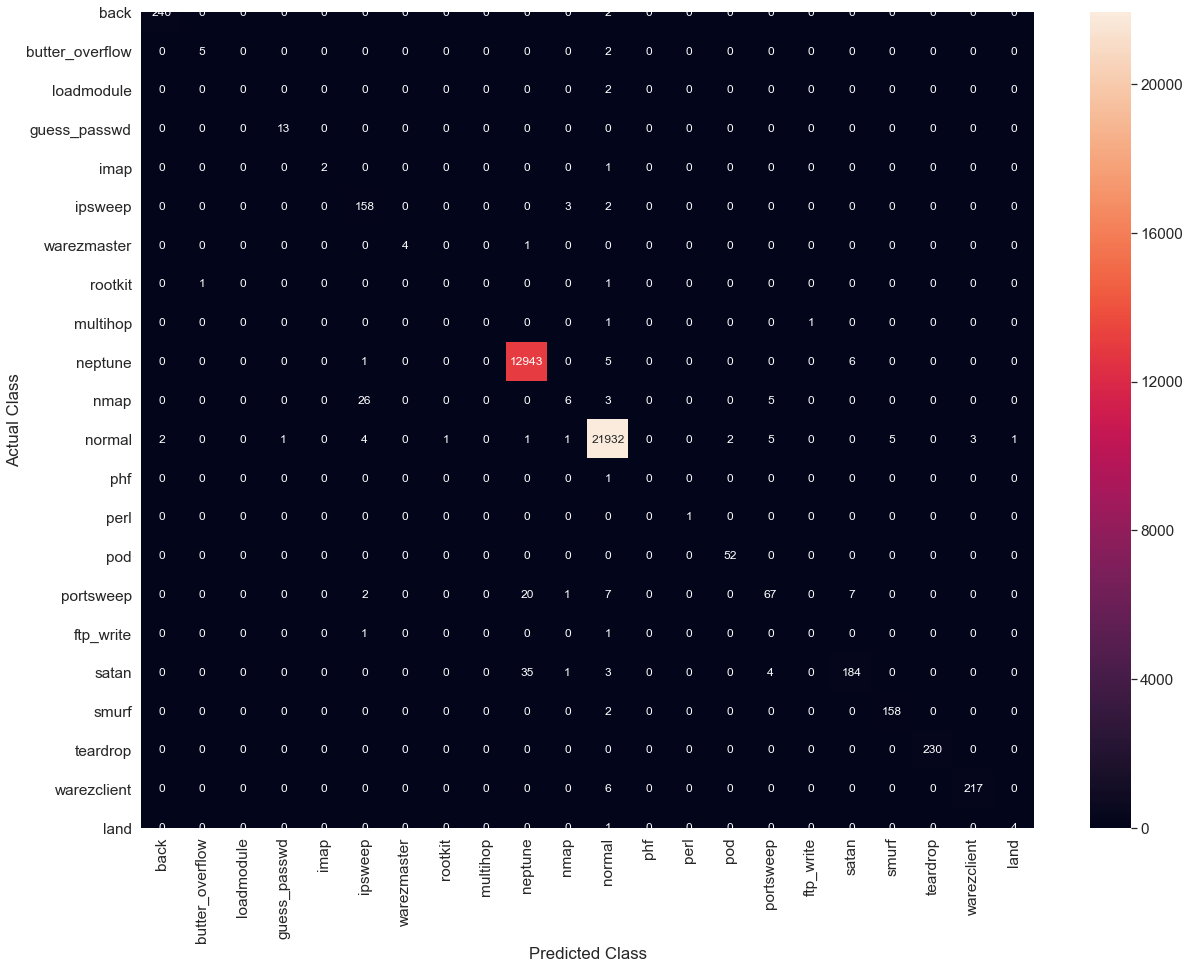

Accuracy score is:
0.9967762320380258


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision score is:
0.994434518193718
Recall score is:
0.9950270626700003


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1-score is:
0.9945328223864224


In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3, n_jobs=-1)
knn_tr, knn_test = model(knn, X_train, Y_train, X_test, Y_test)